In [53]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm
import pandas as pd
import csv

In [6]:
path = "/mnt/disks/sdc/data/"
path_j = "/mnt/disks/sdc/data_journals/"

In [3]:
with open(path+"nb_citations.p",'rb') as f:
    nb_citations = pickle.load(f)

In [7]:
with open(path_j+'avg_sim_journal_year.p','rb') as f:
    art_sim_avg = pickle.load(f)

In [8]:
with open(path_j+'dict_journals_year.p','rb') as f:
    dict_journals_years = pickle.load(f)

In [10]:
journals_years = list(dict_journals_years.keys())
nb_journals_years = len(journals_years)

In [40]:
disciplines = pd.read_csv(path+'liste_discipline.txt',encoding='latin_1',sep='\t')
list_disciplines = pd.unique(disciplines['EDiscipline'])
code_disc_dict = {}
for i,row in disciplines.iterrows():
    code_disc_dict[row["Code_Discipline"]] = row["EDiscipline"]

In [56]:
journal_disc_dict = {}
with open(path+'Liste_Revue.txt','r') as f:
    #lines = f.readlines()
    reader = csv.reader(f,delimiter='\t')
    print(next(reader))
    for line in reader:
        ID = int(line[0])
        journal_disc_dict[ID] = code_disc_dict[int(line[1])]

['Code_Revue', 'Code_Discipline']


In [169]:
min_n = 10

In [159]:
nb_disciplines = len(list_disciplines)

In [128]:
list_disciplines

['Biology',
 'Biomedical Research',
 'Chemistry',
 'Clinical Medicine',
 'Earth and Space',
 'Engineering and Technology',
 'Mathematics',
 'Physics',
 'Psychology',
 'Health',
 'Social Sciences',
 'Professional Fields',
 'Humanities',
 'Arts']

In [136]:
groups_disc = {'Social Sciences':['Psychology','Professional Fields','Health','Social Sciences'],
              'Arts and Humanities':['Arts','Humanities'],
              'Natural Sciences and Engineering':['Physics','Mathematics','Biology','Chemistry','Earth and Space','Engineering and Technology'],
              'Health':['Clinical Medicine','Biomedical Research']}

In [139]:
group_map = {}
for group in groups_disc:
    group_disc = groups_disc[group]
    for disc in group_disc:
        group_map[disc] = group

In [170]:
data = {}
for group in groups_disc:
    data[group] = {}

#### Use standardisation

In [90]:
for i in tqdm(range(nb_journals_years)):
    jy = journals_years[i]
    arts_jy = dict_journals_years[jy]
    arts_jy_sim = {}
    for art in arts_jy:
        if art in art_sim_avg:
            arts_jy_sim[art] = art_sim_avg[art] 
    if len(arts_jy_sim) >= min_n:
        nb_cits = []
        arts_incl = list(arts_jy_sim.keys())
        for art in arts_incl:
            if art in nb_citations:
                nb_cits.append(nb_citations[art])
            else:
                nb_cits.append(0)
        nb_cits = np.log(np.array(nb_cits)+1)
        std_cits = np.std(nb_cits)
        if std_cits == 0:
            pass
        else:
            avg_cits = np.mean(nb_cits)
            nb_cits = (nb_cits-avg_cits)/std_cits
        for j in range(len(nb_cits)):
            art = arts_incl[j]
            nb_cits_art = nb_cits[j]
            data[group_map[journal_disc_dict[jy[0]]]][art] = [nb_cits_art,arts_jy_sim[art]]

            


/home/User1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


A Jupyter Widget

#### Use raw cits

In [161]:
min_avg_cits = 2

In [171]:
for i in tqdm(range(nb_journals_years)):
    jy = journals_years[i]
    arts_jy = dict_journals_years[jy]
    arts_jy_sim = {}
    for art in arts_jy:
        if art in art_sim_avg:
            arts_jy_sim[art] = art_sim_avg[art] 
    if len(arts_jy_sim) >= min_n:
        nb_cits = []
        arts_incl = list(arts_jy_sim.keys())
        for art in arts_incl:
            if art in nb_citations:
                nb_cits.append(nb_citations[art])
            else:
                nb_cits.append(0)
        nb_cits = np.array(nb_cits)
        mean_cits = np.mean(nb_cits)
        if mean_cits < min_avg_cits:
            pass
        else:
            nb_cits = nb_cits/mean_cits
        for j in range(len(nb_cits)):
            art = arts_incl[j]
            nb_cits_art = nb_cits[j]
            data[group_map[journal_disc_dict[jy[0]]]][art] = [nb_cits_art,arts_jy_sim[art]]

/home/User1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


A Jupyter Widget

In [118]:
from scipy import stats
import statsmodels.api as sm
list_disciplines = list(list_disciplines)
list_disciplines.remove('Unknown')


ValueError: list.remove(x): x not in list

In [141]:
groups = list(groups_disc.keys())
nb_groups = len(groups)

### Correlation disc

In [152]:
import os

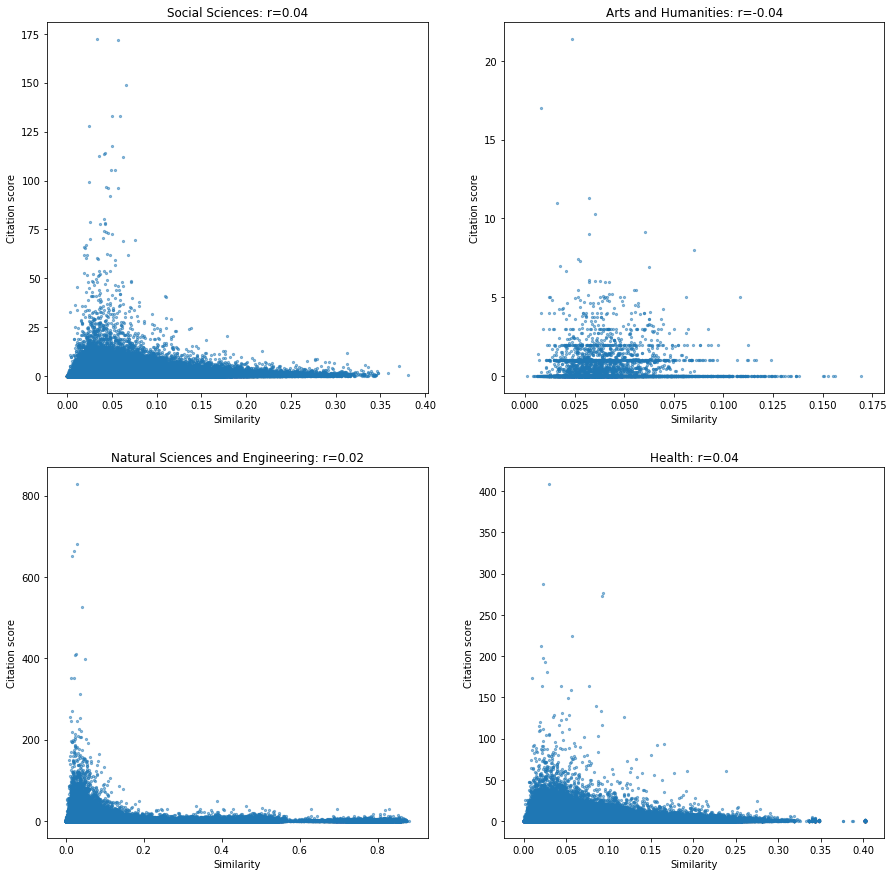

In [163]:
plt.figure(figsize=(15,15))
for i in range(nb_groups):
    #disc = list_disciplines[i]
    group = groups[i]
    nb_cits = []
    sim = []
    for art in data[group]:
        nb_cits.append(data[group][art][0])
        sim.append(data[group][art][1])
        
    plt.subplot(2,2,i+1)
    plt.scatter(sim,nb_cits,s=5,alpha=0.5)
    pears = np.corrcoef(nb_cits,sim)
    #results = sm.OLS(nb_cits,sim).fit()
    #X_plot = np.linspace(min(sim),max(sim),100)
    #plt.plot(X_plot, X_plot*results.params[0] + results.params[1])
    plt.title('{}: r={}'.format(group,np.round(pears[0,1],2)))
    plt.ylabel('Citation score')
    plt.xlabel('Similarity')
plt.show()
# out_path = path_j+'results_sim_journals/'
# if not os.path.exists(out_path):
#     os.makedirs(out_path)
# plt.savefig(out_path+'scatter_sim_citations.png')    
# plt.close()

### Distribution sim disc

In [154]:
plt.figure(figsize=(15,15))
for i in range(nb_groups):
    #disc = list_disciplines[i]
    group = groups[i]
    sim = []
    for art in data[group]:
        sim.append(data[group][art][1])
        
    plt.subplot(2,2,i+1)
    plt.hist(sim,bins=50)
    #results = sm.OLS(nb_cits,sim).fit()
    #X_plot = np.linspace(min(sim),max(sim),100)
    #plt.plot(X_plot, X_plot*results.params[0] + results.params[1])
    plt.title(group)
    plt.ylabel('Frequency')
    plt.xlabel('Similarity')
    plt.xlim([0,0.4])
#plt.show()
out_path = path_j+'results_sim_journals/'
if not os.path.exists(out_path):
    os.makedirs(out_path)
plt.savefig(out_path+'dist_sim_citations.png')    
plt.close()

### Variance cit as a function of sim

In [186]:
#min_sim = min(sim)
#max_sim = 0.351
#sim = np.array(sim)
#bins_sim = np.arange(min_sim,max_sim,bin_size)
#bins_sim = np.array([0,0.025,0.05,0.075,0.1,0.15,0.2,0.25,0.3,0.35])
bins_sim = np.arange(0,0.2,0.005)

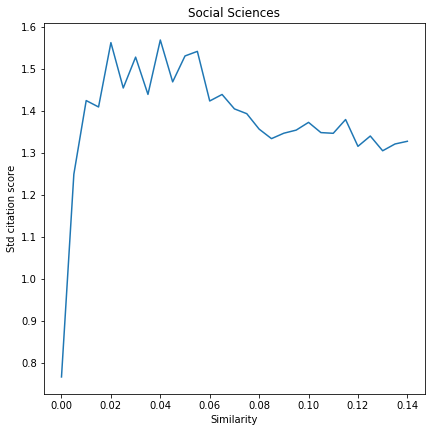

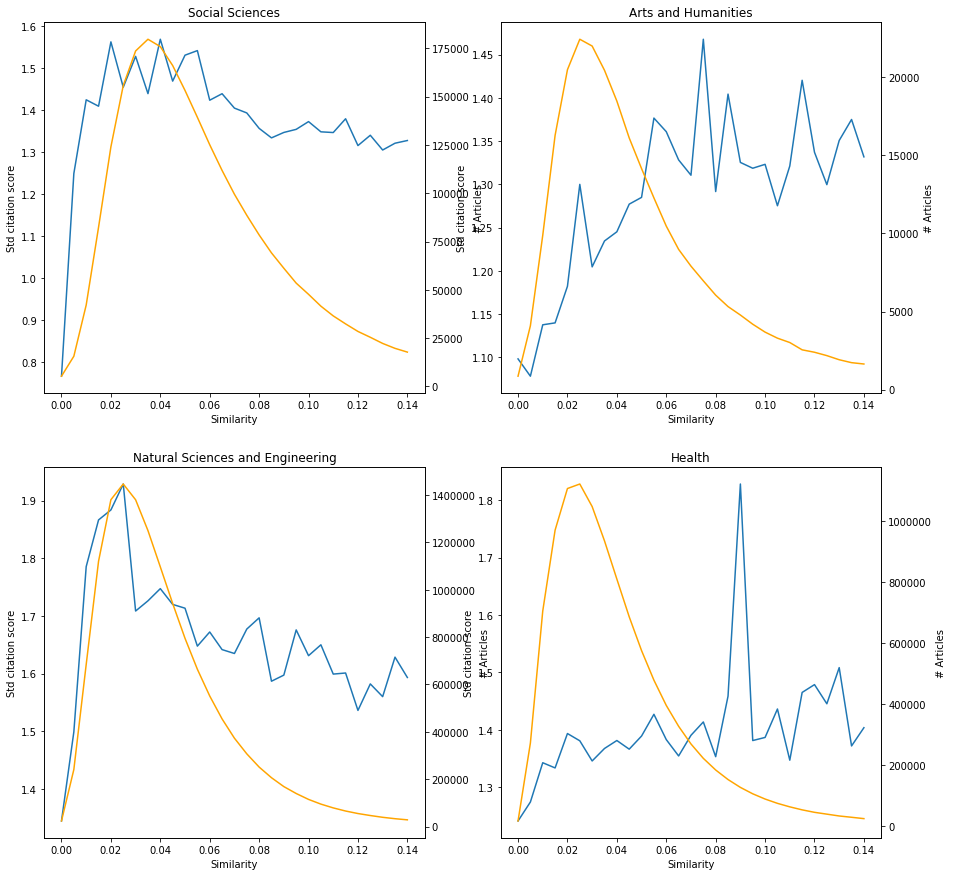

In [179]:
plt.figure(figsize=(20,15))
for i in range(nb_groups):
    #disc = list_disciplines[i]
    group = groups[i]
    nb_cits = []
    sim = []
    nb_arts = []
    for art in data[group]:
        nb_cits.append(data[group][art][0])
        sim.append(data[group][art][1])
    nb_cits = np.array(nb_cits)
    std_sim = []
    for j in range(len(bins_sim)-1):
        min_j = bins_sim[j]
        max_j = bins_sim[j+1]
        idx_sim = np.where((sim>=min_j) & (sim < max_j))[0]
        if len(idx_sim) > 20:
            cits_bin = nb_cits[idx_sim]
            std_sim.append(np.std(cits_bin))
            nb_arts.append(len(cits_bin))
        else:
            std_sim.append(np.nan)
    
    
    plt.subplot(2,2,i+1)
    plt.plot(bins_sim[:-1],std_sim)
    #pears = np.corrcoef(bins_sim[:-1],std_sim)
    #results = sm.OLS(nb_cits,sim).fit()
    #X_plot = np.linspace(min(sim),max(sim),100)
    #plt.plot(X_plot, X_plot*results.params[0] + results.params[1])
    plt.title('{}'.format(group))
    plt.ylabel('Std citation score')
    plt.xlabel('Similarity')
    plt.twinx()
    plt.plot(bins_sim[:-1],nb_arts,'orange')
    plt.ylabel('# Articles')
plt.show()
# out_path = path_j+'results_sim_journals/'
# if not os.path.exists(out_path):
#     os.makedirs(out_path)
# plt.savefig(out_path+'std_sim_citations.png')    
# plt.close()

### Mean cit as a function of sim

In [189]:
plt.figure(figsize=(20,15))
for i in range(nb_groups):
    #disc = list_disciplines[i]
    group = groups[i]
    nb_cits = []
    sim = []
    nb_arts = []
    for art in data[group]:
        nb_cits.append(data[group][art][0])
        sim.append(data[group][art][1])
    
    nb_cits = np.array(nb_cits)

    std_sim = []
    for j in range(len(bins_sim)-1):
        min_j = bins_sim[j]
        max_j = bins_sim[j+1]
        idx_sim = np.where((sim>=min_j) & (sim < max_j))[0]
        if len(idx_sim) > 20:
            cits_bin = nb_cits[idx_sim]
            std_sim.append(np.mean(cits_bin))
            nb_arts.append(len(cits_bin))
        else:
            std_sim.append(np.nan)
    
    
    plt.subplot(2,2,i+1)
    plt.plot(bins_sim[:-1],std_sim)
    pears = np.corrcoef(bins_sim[:-1],std_sim)
    #results = sm.OLS(nb_cits,sim).fit()
    #X_plot = np.linspace(min(sim),max(sim),100)
    #plt.plot(X_plot, X_plot*results.params[0] + results.params[1])
    plt.title('{}'.format(group))
    plt.ylabel('Average citation score')
    plt.xlabel('Similarity')
    
    plt.twinx()
    plt.plot(bins_sim[:-1],nb_arts,'orange')
    plt.ylabel('# Articles')
#plt.show()
out_path = path_j+'results_sim_journals/'
if not os.path.exists(out_path):
    os.makedirs(out_path)
plt.savefig(out_path+'avg_sim_citations_0.20.png')    
plt.close()

### Nb art per sim

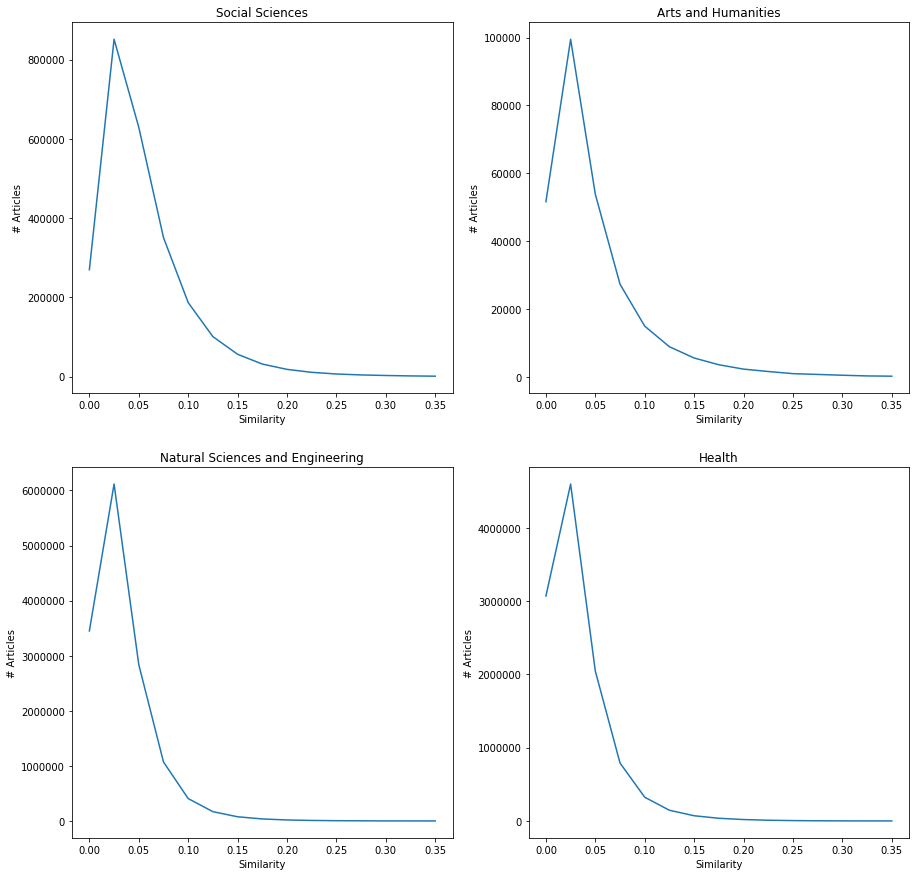

In [183]:
plt.figure(figsize=(15,15))
for i in range(nb_groups):
    #disc = list_disciplines[i]
    group = groups[i]
    nb_cits = []
    sim = []
    for art in data[group]:
        nb_cits.append(data[group][art][0])
        sim.append(data[group][art][1])
    
    nb_cits = np.array(nb_cits)
    bins_sim = np.arange(0,0.40,0.025)
    std_sim = []
    for j in range(len(bins_sim)-1):
        min_j = bins_sim[j]
        max_j = bins_sim[j+1]
        idx_sim = np.where((sim>=min_j) & (sim < max_j))[0]
        if len(idx_sim) > 20:
            cits_bin = nb_cits[idx_sim]
            std_sim.append(len(cits_bin))
        else:
            std_sim.append(0)
    
    
    plt.subplot(2,2,i+1)
    plt.plot(bins_sim[:-1],std_sim)
    pears = np.corrcoef(bins_sim[:-1],std_sim)
    #results = sm.OLS(nb_cits,sim).fit()
    #X_plot = np.linspace(min(sim),max(sim),100)
    #plt.plot(X_plot, X_plot*results.params[0] + results.params[1])
    plt.title('{}'.format(group))
    plt.ylabel('# Articles')
    plt.xlabel('Similarity')
plt.show()
# out_path = path_j+'results_sim_journals/'
# if not os.path.exists(out_path):
#     os.makedirs(out_path)
# plt.savefig(out_path+'hist_nb_citations.png')    
# plt.close()

In [184]:
out_path = path_j+'results_sim_journals/'
if not os.path.exists(out_path):
    os.makedirs(out_path)
plt.savefig(out_path+'hist_nb_citations.png')    
plt.close()

In [86]:
len(sim)

33656

In [75]:
temp =  np.corrcoef(nb_cits,sim)

In [79]:
temp[0,1]

0.065510405109229286

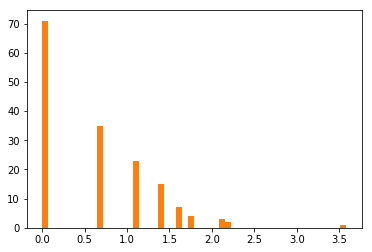

In [30]:
plt.hist(np.log(np.array(nb_cits)+1),bins=50)
plt.show()

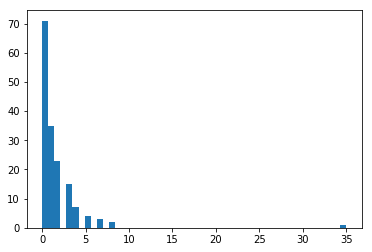

In [34]:
plt.hist(stats.boxcox(np.array(nb_cits)+1,lmbda=1),bins=50)
plt.show()